<a href="https://colab.research.google.com/github/MustafaGhaziTalab/BDM/blob/main/K-Means-ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  ASSIGNMENT 3

#MECS1033-01 KEPINTARAN BUATAN LANJUTAN (ADVANCED ARTIFICIAL INTELLIGENCE)
##MUSTAFA GHAZI TALAB


### Title: Customer Review Analysis of Amazon Sales Dataset Using Unsupervised Clustering Algorithm

## 1. PACKAGES

In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import re
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import string
import html
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


## 2. DATASET

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
# os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kagg1"
!kaggle datasets download -d karkavelrajaj/amazon-sales-dataset
!unzip \*.zip && rm *.zip


Mounted at /content/gdrive
100% 1.95M/1.95M [00:00<00:00, 2.89MB/s]
100% 1.95M/1.95M [00:00<00:00, 2.53MB/s]
Archive:  amazon-sales-dataset.zip
  inflating: amazon.csv              


In [54]:
df = pd.read_csv('amazon.csv')

In [55]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [56]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [57]:
df = df[['category','discounted_price', 'review_content']]

In [58]:
df.shape

(1465, 3)

Cleaning missing values and duplicates

In [59]:
df.isnull().sum()

category            0
discounted_price    0
review_content      0
dtype: int64

In [10]:
df['review_content'].duplicated().sum()

253

In [60]:
df.drop_duplicates(subset='review_content', keep='first', inplace=True)
df.reset_index(drop=True, inplace=True) #this reset the no of rows


In [61]:
df['review_content'].duplicated().sum()

0

In [62]:
df.shape #total shape with no duplicate or missing values

(1212, 3)

In [63]:
df

,category,discounted_price,review_content
0,Computers&Accessories|Accessories&Peripherals|...,₹399,Looks durable Charging is fine tooNo complains...
1,Computers&Accessories|Accessories&Peripherals|...,₹199,I ordered this cable to connect my phone to An...
2,Computers&Accessories|Accessories&Peripherals|...,₹199,"Not quite durable and sturdy,https://m.media-a..."
3,Computers&Accessories|Accessories&Peripherals|...,₹329,"Good product,long wire,Charges good,Nice,I bou..."
4,Computers&Accessories|Accessories&Peripherals|...,₹154,"Bought this instead of original apple, does th..."
...,...,...,...
1207,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,"I received product without spanner,Excellent p..."
1208,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","ok,got everything as mentioned but the measuri..."
1209,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,219","plastic but cool body ,u have to find sturdy s..."
1210,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,399",I have installed this in my kitchen working fi...


In [64]:
df['review_content'].iloc[75]

'Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original iPhone cable,Good quality, would recommend,https://m.media-amazon.com/images/I/81---F1ZgHL._SY88.jpg,Product had worked well till date and was having no issue.Cable is also sturdy enough...Have asked for replacement and company is doing the same...,Value for money'

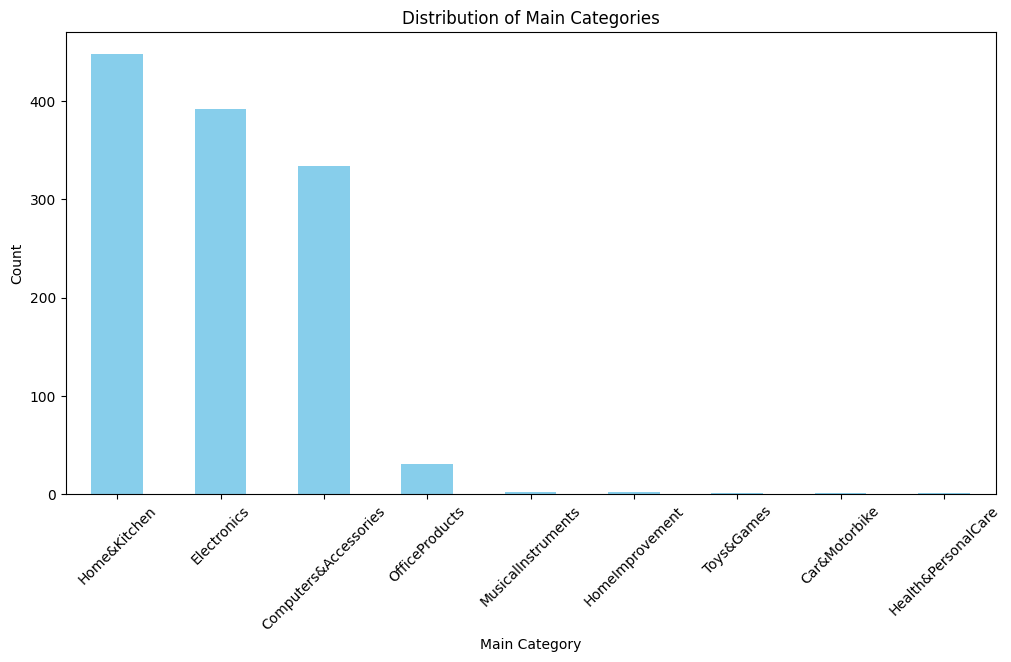

In [65]:
import matplotlib.pyplot as plt

# Split categories and extract the first level
df['main_category'] = df['category'].str.split('|').str[0]

# Plot the distribution of main categories
plt.figure(figsize=(12, 6))
df['main_category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Main Categories')
plt.xlabel('Main Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

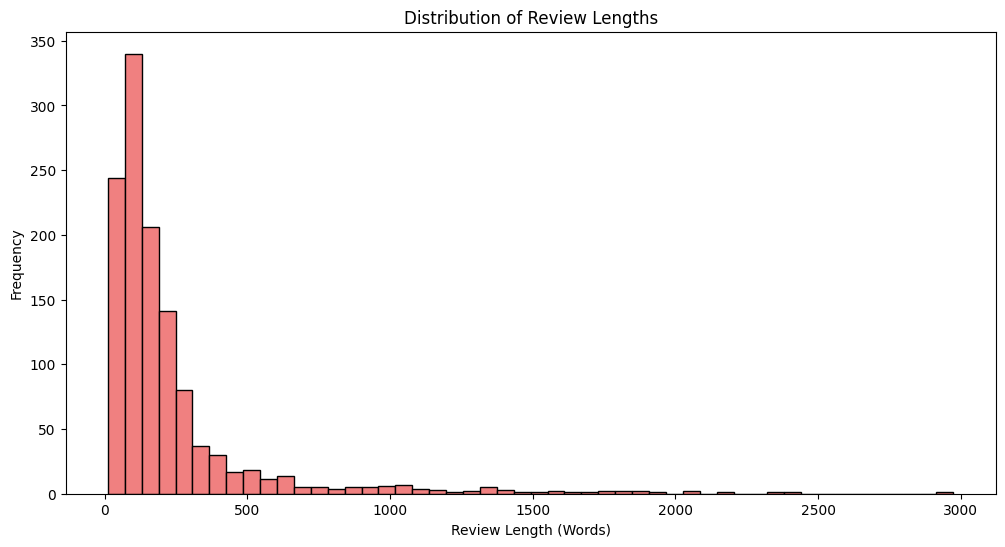

In [66]:
import matplotlib.pyplot as plt

# Calculate the length of reviews in terms of words
review_length = df['review_content'].apply(lambda x: len(x.split()))

# Plot the distribution of review lengths
plt.figure(figsize=(12, 6))
plt.hist(review_length, bins=50, color='lightcoral', edgecolor='black')  # Fix the syntax error here
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (Words)')
plt.ylabel('Frequency')
plt.show()

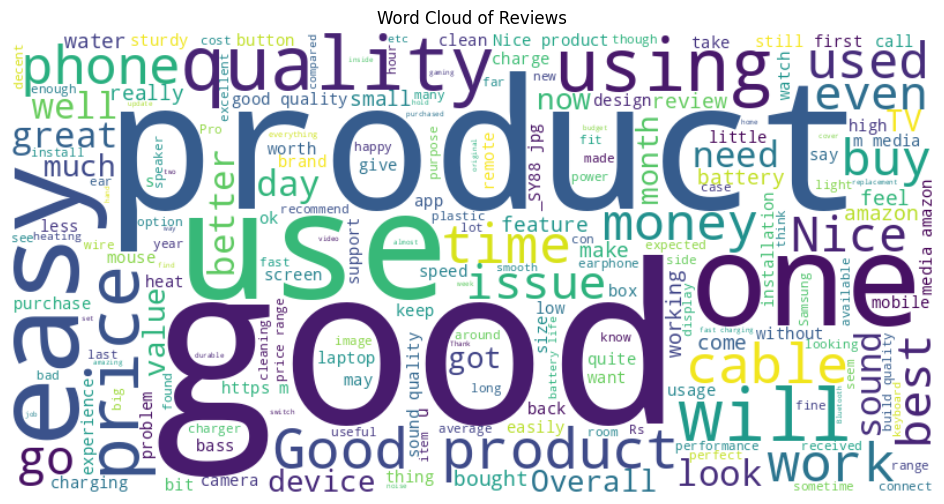

In [67]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all reviews into a single text
all_reviews = ' '.join(df['review_content'])

# Generate and plot a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()


## 3. TEXT PREPROCESSING

In [68]:
# define abbreviations dictionary
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk",
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart",
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet",
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously",
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired",
    "amp" : ""

}

# Define contractions dictionary
contractions = {
    "won't": "will not",
    "wouldn't": "would not",
    "couldn't": "could not",
    "I'm": "I am",
    "I've": "I have",
    "I'd": "I would",
    "I'll": "I will",
    "can't": "cannot",
    "n't": "not",
    "'d": " would",
    "'re": " are",
    "'s": " is",
    "'ll": " will",
    "'t": " not",
    "'ve": " have",
    "'m": " am",
}

In [69]:
# Function to find abbreviations and print information directly
def print_abbreviations_info(row):
    found_abbrevs = []
    for key, value in abbreviations.items():
        if key in row['review_content']:
            found_abbrevs.append((key, value))

    if found_abbrevs:
        print(f"Category: {row['category']}, Review Content: {row['review_content']}")
        print("Found Abbreviations:")
        for abbrev, full_form in found_abbrevs:
            print(f"  {abbrev}: {full_form}")
        print()

# Apply the function to each row in the DataFrame
df.apply(print_abbreviations_info, axis=1)


Streaming output truncated to the last 5000 lines.
  tho: though
  til: today i learned
  u: you
  wb: welcome back

Category: Home&Kitchen|Heating,Cooling&AirQuality|RoomHeaters|ElectricHeaters, Review Content: पहले भी 2 बजाज के रूम हीटर मैंने अमेजन से मंगवाए थे जो बजाज के पैकेजिंग डिब्बे को एक दूसरे बड़े अमेजन के डिब्बे में पैक करके आया था और सुरक्षित प्राप्त हुए। इस बार सीधे ही बजाज के डिब्बे पे  एड्रेस चिपका के भेज दिया मेरे पास आने तक डिब्बा कई जगह से फट गया था  प्लीज पैकिंग को पुनः एक और डिब्बे में करके भेजे,Nice products,Good product,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81xVUFEVuIL._SY88.jpg,,Less heating according to the price.,Works well, has been using it from a month for Bangalore like temperature in winters. Good for a single room heating purpose. Doesnt get too much heated. Kept it on whole night. there is no temp control as it is not needed for 1000watt heaters.,Acha hai
Found Abbreviations:
  gal: get a life
  gl: good luck
  ht: height
  ic: i see

0       None
1       None
2       None
3       None
4       None
        ... 
1207    None
1208    None
1209    None
1210    None
1211    None
Length: 1212, dtype: object

Text Cleaning

In [70]:
def clean_text(text):

    # Lowercasing
    text = text.lower()

    # Handling contractions
    for key, value in contractions.items():
        text = text.replace(key, value)

    # Unescape HTML entities
    text = html.unescape(text)

    # Handling numerical characters
    text = re.sub(r'\d+', ' ', text)

    # Handling email addresses and URLs
    text = re.sub(r'\S*@\S*\s?', ' ', text)
    text = re.sub(r'http\S+', ' ', text)

    # Removing HTML tags
    text = re.sub(r"<.*?>", ' ', text)

    # Removing punctuations
    text = re.sub(r'[^\w\s]', ' ', text)

    # Removing non-alphanumeric characters
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

    return text

df['clean_text'] = df['review_content'].apply(clean_text)


In [71]:
df

,category,discounted_price,review_content,main_category,clean_text
0,Computers&Accessories|Accessories&Peripherals|...,₹399,Looks durable Charging is fine tooNo complains...,Computers&Accessories,looks durable charging is fine toono complains...
1,Computers&Accessories|Accessories&Peripherals|...,₹199,I ordered this cable to connect my phone to An...,Computers&Accessories,i ordered this cable to connect my phone to an...
2,Computers&Accessories|Accessories&Peripherals|...,₹199,"Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,not quite durable and sturdy t images i r...
3,Computers&Accessories|Accessories&Peripherals|...,₹329,"Good product,long wire,Charges good,Nice,I bou...",Computers&Accessories,good product long wire charges good nice i bou...
4,Computers&Accessories|Accessories&Peripherals|...,₹154,"Bought this instead of original apple, does th...",Computers&Accessories,bought this instead of original apple does th...
...,...,...,...,...,...
1207,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,"I received product without spanner,Excellent p...",Home&Kitchen,i received product without spanner excellent p...
1208,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","ok,got everything as mentioned but the measuri...",Home&Kitchen,ok got everything as mentioned but the measuri...
1209,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,219","plastic but cool body ,u have to find sturdy s...",Home&Kitchen,plastic but cool body u have to find sturdy s...
1210,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,399",I have installed this in my kitchen working fi...,Home&Kitchen,i have installed this in my kitchen working fi...


In [72]:
!pip install nltk
# Function to tokenize, remove abbreviations, remove stopwords
def process_text(text):
    tokens = word_tokenize(text)

    # Replace abbreviations
    tokens = [token for token in tokens if token.lower() not in abbreviations]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    return tokens

# Apply the function to the 'clean_text' column in the DataFrame
df['clean_text'] = df['clean_text'].apply(process_text)

# Print the output for the first few rows
df.head()

,category,discounted_price,review_content,main_category,clean_text
0,Computers&Accessories|Accessories&Peripherals|...,₹399,Looks durable Charging is fine tooNo complains...,Computers&Accessories,"[looks, durable, charging, fine, toono, compla..."
1,Computers&Accessories|Accessories&Peripherals|...,₹199,I ordered this cable to connect my phone to An...,Computers&Accessories,"[ordered, cable, connect, phone, android, auto..."
2,Computers&Accessories|Accessories&Peripherals|...,₹199,"Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,"[quite, durable, sturdy, images, riggrbucl, sy..."
3,Computers&Accessories|Accessories&Peripherals|...,₹329,"Good product,long wire,Charges good,Nice,I bou...",Computers&Accessories,"[good, product, long, wire, charges, good, nic..."
4,Computers&Accessories|Accessories&Peripherals|...,₹154,"Bought this instead of original apple, does th...",Computers&Accessories,"[bought, instead, original, apple, work, rs, f..."


Lemmatization

In [73]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [74]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')  # Add this line

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [75]:
# Function to extract part of speech (POS)
def get_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {'V': wordnet.VERB,
               'N': wordnet.NOUN,
               'J': wordnet.ADJ,
               'R': wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Function to process text by lemmatizing and extracting POS
def process_text(text):
    # Lemmatize and extract POS
    lem_text = [lemmatizer.lemmatize(token, get_pos(token)) for token in text]

    return lem_text

# Apply the function to the 'clean_text' column in the DataFrame
df['clean_text'] = df['clean_text'].apply(process_text)

# Print the output for the first few rows
df.head()

,category,discounted_price,review_content,main_category,clean_text
0,Computers&Accessories|Accessories&Peripherals|...,₹399,Looks durable Charging is fine tooNo complains...,Computers&Accessories,"[look, durable, charge, fine, toono, complains..."
1,Computers&Accessories|Accessories&Peripherals|...,₹199,I ordered this cable to connect my phone to An...,Computers&Accessories,"[order, cable, connect, phone, android, auto, ..."
2,Computers&Accessories|Accessories&Peripherals|...,₹199,"Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,"[quite, durable, sturdy, image, riggrbucl, sy,..."
3,Computers&Accessories|Accessories&Peripherals|...,₹329,"Good product,long wire,Charges good,Nice,I bou...",Computers&Accessories,"[good, product, long, wire, charge, good, nice..."
4,Computers&Accessories|Accessories&Peripherals|...,₹154,"Bought this instead of original apple, does th...",Computers&Accessories,"[bought, instead, original, apple, work, r, fa..."


In [76]:
df['clean_text'].iloc[3]

['good',
 'product',
 'long',
 'wire',
 'charge',
 'good',
 'nice',
 'bought',
 'cable',
 'r',
 'worthy',
 'product',
 'price',
 'test',
 'various',
 'charger',
 'adapter',
 'w',
 'w',
 'support',
 'fast',
 'charge',
 'well',
 'good',
 'ok',
 'get',
 'good',
 'price',
 'sale',
 'amazon',
 'product',
 'useful',
 'warranty',
 'warranty',
 'need',
 'go',
 'far',
 'practical',
 'cost',
 'mine',
 'micro',
 'type',
 'c',
 'connector',
 'stop',
 'work',
 'day',
 'like',
 'product']

In [77]:
# Function to process text by removing small words and empty spaces
def process_text(tokens):
    # Remove small words (1 letter) and empty spaces
    filtered_tokens = [word for word in tokens if len(word) > 1 and word.strip()]

    return filtered_tokens

# Apply the function to the 'clean_text' column in the DataFrame
df['clean_text'] = df['clean_text'].apply(process_text)

# Print the output for the first few rows
df.head()


,category,discounted_price,review_content,main_category,clean_text
0,Computers&Accessories|Accessories&Peripherals|...,₹399,Looks durable Charging is fine tooNo complains...,Computers&Accessories,"[look, durable, charge, fine, toono, complains..."
1,Computers&Accessories|Accessories&Peripherals|...,₹199,I ordered this cable to connect my phone to An...,Computers&Accessories,"[order, cable, connect, phone, android, auto, ..."
2,Computers&Accessories|Accessories&Peripherals|...,₹199,"Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,"[quite, durable, sturdy, image, riggrbucl, sy,..."
3,Computers&Accessories|Accessories&Peripherals|...,₹329,"Good product,long wire,Charges good,Nice,I bou...",Computers&Accessories,"[good, product, long, wire, charge, good, nice..."
4,Computers&Accessories|Accessories&Peripherals|...,₹154,"Bought this instead of original apple, does th...",Computers&Accessories,"[bought, instead, original, apple, work, fast,..."


In [78]:
# Rename the 'discounted_price' column to 'transactional_value'
df.rename(columns={'discounted_price': 'transactional_value'}, inplace=True)

In [79]:
df['clean_text'].iloc[3]

['good',
 'product',
 'long',
 'wire',
 'charge',
 'good',
 'nice',
 'bought',
 'cable',
 'worthy',
 'product',
 'price',
 'test',
 'various',
 'charger',
 'adapter',
 'support',
 'fast',
 'charge',
 'well',
 'good',
 'ok',
 'get',
 'good',
 'price',
 'sale',
 'amazon',
 'product',
 'useful',
 'warranty',
 'warranty',
 'need',
 'go',
 'far',
 'practical',
 'cost',
 'mine',
 'micro',
 'type',
 'connector',
 'stop',
 'work',
 'day',
 'like',
 'product']

In [81]:
# Check for empty strings in 'clean_text', in order to ensure no problem during feature reduction
empty_strings = df[df['clean_text'].apply(lambda x: all(token.isspace() for token in x))]

# Print the results
print("Rows with empty strings in 'clean_text':")
print(empty_strings)


Rows with empty strings in 'clean_text':
Empty DataFrame
Columns: [category, transactional_value, review_content, main_category, clean_text]
Index: []


# 4. DATA TRANSFORMATION

## TF-IDF


In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
tfidf_vec = TfidfVectorizer()

In [84]:
# split the dataset into train and test
X = [' '.join(doc) for doc in df['clean_text']]

In [85]:

X_tfidf = tfidf_vec.fit_transform(X)

In [86]:
X_tfidf

<1212x9964 sparse matrix of type '<class 'numpy.float64'>'
	with 101460 stored elements in Compressed Sparse Row format>

Dimensionality reduction

In [87]:
from sklearn.decomposition import PCA

In [88]:
pca = PCA(n_components=2)

In [89]:
X_tfidf_pca = pca.fit_transform(X_tfidf.toarray())

In [90]:
df['pca_tfidf_1'] = pd.DataFrame(X_tfidf_pca)[0]
df['pca_tfidf_2'] = pd.DataFrame(X_tfidf_pca)[1]

In [91]:
df

,category,transactional_value,review_content,main_category,clean_text,pca_tfidf_1,pca_tfidf_2
0,Computers&Accessories|Accessories&Peripherals|...,₹399,Looks durable Charging is fine tooNo complains...,Computers&Accessories,"[look, durable, charge, fine, toono, complains...",0.415434,-0.073351
1,Computers&Accessories|Accessories&Peripherals|...,₹199,I ordered this cable to connect my phone to An...,Computers&Accessories,"[order, cable, connect, phone, android, auto, ...",0.486540,0.007780
2,Computers&Accessories|Accessories&Peripherals|...,₹199,"Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,"[quite, durable, sturdy, image, riggrbucl, sy,...",-0.017260,-0.122315
3,Computers&Accessories|Accessories&Peripherals|...,₹329,"Good product,long wire,Charges good,Nice,I bou...",Computers&Accessories,"[good, product, long, wire, charge, good, nice...",0.265743,-0.077394
4,Computers&Accessories|Accessories&Peripherals|...,₹154,"Bought this instead of original apple, does th...",Computers&Accessories,"[bought, instead, original, apple, work, fast,...",0.491130,-0.015842
...,...,...,...,...,...,...,...
1207,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,"I received product without spanner,Excellent p...",Home&Kitchen,"[receive, product, without, spanner, excellent...",-0.069589,-0.062170
1208,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","ok,got everything as mentioned but the measuri...",Home&Kitchen,"[ok, get, everything, mention, measure, cup, b...",-0.088736,-0.089887
1209,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","₹2,219","plastic but cool body ,u have to find sturdy s...",Home&Kitchen,"[plastic, cool, body, find, sturdy, surface, p...",-0.066395,-0.108106
1210,"Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...","₹1,399",I have installed this in my kitchen working fi...,Home&Kitchen,"[instal, kitchen, work, fine, fan, speed, slow...",-0.009568,-0.038024


# 5. Clustering

### kmeans

In [92]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

determining number of cluster

In [93]:
wcss = []  # within-cluster sum of squares
silhouette_scores = []
cluster_range = []

for k in range(2,11):
    kmeans = KMeans(init='k-means++', n_init=12, n_clusters=k, random_state=42)
    cluster_assignments = kmeans.fit(X_tfidf_pca)
    wcss.append(kmeans.inertia_)
    cluster = kmeans.labels_
    cluster_range.append(k)

    silhouette_scores.append(silhouette_score(df[['pca_tfidf_1','pca_tfidf_2']], cluster))


    # Printing Centroids
    #print(f'Centroids for {k} clusters:')
    #print(kmeans.cluster_centers_)

    # Printing Cluster Assignments
    #print(f'Cluster Assignments for {n_clusters} clusters:')
    #print(cluster_assignments)

    # Printing Inertia
    #print(f'Inertia for {k} clusters: {kmeans.inertia_}')
    #print('---------------------------------------------------------')

print("The Silhoutte Scores for K-means")
print(silhouette_scores)

# Plotting Silhouette Scores vs. Number of Clusters
#plt.plot(cluster_range, silhouette_scores, marker='o')
#plt.xlabel('Number of Clusters')
#plt.ylabel('Silhouette Score')
#plt.title('Silhouette Scores vs. Number of Clusters')
#plt.show()


The Silhoutte Scores for K-means
[0.6104921478983207, 0.5772541501852508, 0.5810341949331996, 0.45323155943985244, 0.4282642337747199, 0.40574781109946223, 0.41185280117420425, 0.41415653960959714, 0.3796672573434169]


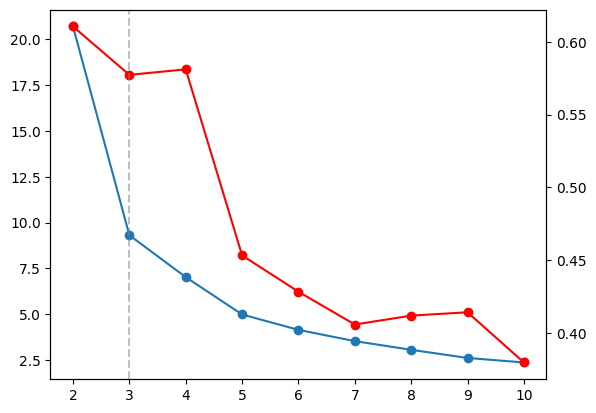

In [94]:
# Plot the Elbow method
# Plot the elbow curve
fig, ax1 = plt.subplots()
ax1.plot(range(2,11), wcss, marker='o')
# ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(range(2,11), silhouette_scores, 'r', marker='o')
ax2.axvline(3,color='grey',alpha=.5, linestyle='--')


In [95]:
ks = range(2,10)
inertia = []

for i in ks:
    kmean_model = KMeans(init='k-means++', n_clusters=i, n_init=10)
    kmean_model.fit(X_tfidf_pca)
    inertia.append(kmean_model.inertia_)

Text(0, 0.5, 'Inertia')

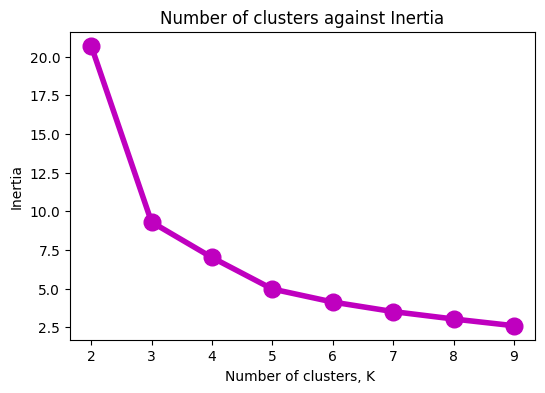

In [96]:
plt.figure(figsize=(6, 4))
plt.plot(ks, inertia,"o-m", linewidth=4, markersize=12)
plt.title("Number of clusters against Inertia", fontsize=12)
plt.xlabel("Number of clusters, K ")
plt.ylabel("Inertia")

In [97]:
pip install yellowbrick

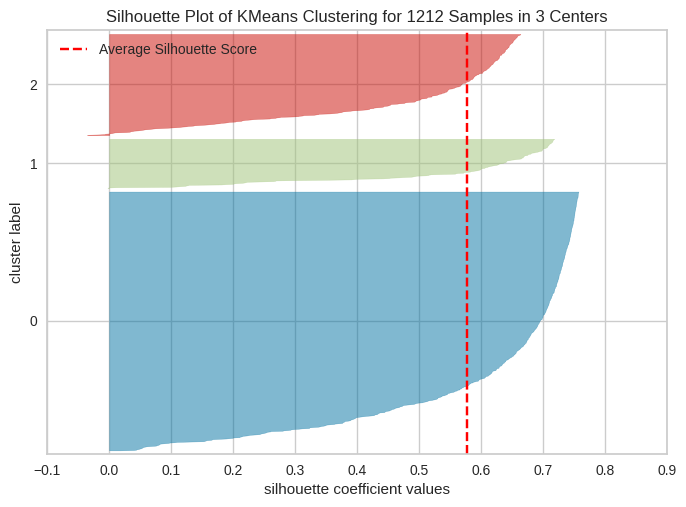

In [98]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=3, random_state=1)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_tfidf_pca)
visualizer.show()
plt.show()

In [99]:
!pip install kneed

In [100]:
from kneed import KneeLocator

kl = KneeLocator(ks, inertia, curve="convex", direction="decreasing")
kl.elbow

3

choosing 3 cluster as the number of cluster

In [101]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit_predict(X_tfidf_pca)

array([1, 1, 0, ..., 0, 0, 0], dtype=int32)

In [102]:
df['cluster_kmeans_tfidf'] = kmeans.labels_

<Axes: xlabel='pca_tfidf_1', ylabel='pca_tfidf_2'>

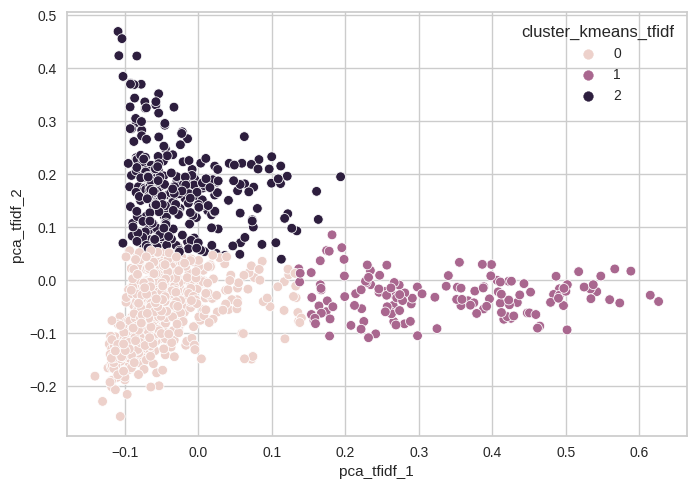

In [103]:
sns.scatterplot(df, x='pca_tfidf_1', y='pca_tfidf_2', hue='cluster_kmeans_tfidf')

In [104]:
kmean_labels = kmeans.labels_
print(kmean_labels)

kmean_cluster_centers = kmeans.cluster_centers_
print(kmean_cluster_centers)

[1 1 0 ... 0 0 0]
[[-0.05236307 -0.06040271]
 [ 0.33230259 -0.02995132]
 [-0.02802023  0.16880456]]


In [105]:
print("Silhoutte Score")
silhouette_score(df[['pca_tfidf_1','pca_tfidf_2']], df['cluster_kmeans_tfidf'])

Silhoutte Score


0.5772541501852508

Interpretation

In [106]:
df.head()

,category,transactional_value,review_content,main_category,clean_text,pca_tfidf_1,pca_tfidf_2,cluster_kmeans_tfidf
0,Computers&Accessories|Accessories&Peripherals|...,₹399,Looks durable Charging is fine tooNo complains...,Computers&Accessories,"[look, durable, charge, fine, toono, complains...",0.415434,-0.073351,1
1,Computers&Accessories|Accessories&Peripherals|...,₹199,I ordered this cable to connect my phone to An...,Computers&Accessories,"[order, cable, connect, phone, android, auto, ...",0.486540,0.007780,1
2,Computers&Accessories|Accessories&Peripherals|...,₹199,"Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,"[quite, durable, sturdy, image, riggrbucl, sy,...",-0.017260,-0.122315,0
3,Computers&Accessories|Accessories&Peripherals|...,₹329,"Good product,long wire,Charges good,Nice,I bou...",Computers&Accessories,"[good, product, long, wire, charge, good, nice...",0.265743,-0.077394,1
4,Computers&Accessories|Accessories&Peripherals|...,₹154,"Bought this instead of original apple, does th...",Computers&Accessories,"[bought, instead, original, apple, work, fast,...",0.491130,-0.015842,1


In [107]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming df is your DataFrame
grouped_by_cluster = df.groupby('cluster_kmeans_tfidf')['clean_text'].apply(lambda x: ' '.join([' '.join(text) for text in x]))

# Use CountVectorizer to get word frequencies for each cluster
vectorizer = CountVectorizer()
cluster_word_counts = vectorizer.fit_transform(grouped_by_cluster)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Display top 10 words for each cluster
for cluster, word_count in enumerate(cluster_word_counts):
    top_words = [feature_names[i] for i in word_count.indices[np.argsort(word_count.data)[-50:]]]
    print(f"Cluster {cluster} Top Words: {', '.join(top_words)}\n-------------------------------------------\n")


Cluster 0 Top Words: size, could, worth, laptop, purchase, bit, heat, amazon, little, issue, fine, clean, light, much, day, take, speed, power, even, would, overall, small, month, really, great, come, give, value, need, buy, best, money, look, go, make, time, also, water, nice, price, well, get, like, one, quality, easy, work, use, product, good
-------------------------------------------

Cluster 1 Top Words: apple, samsung, purchase, last, length, bought, great, data, worth, wire, mobile, sturdy, car, fine, value, issue, durable, buy, best, time, device, type, nice, speed, port, support, money, go, power, long, month, get, look, like, price, also, usb, original, phone, well, charger, one, fast, quality, use, work, product, good, charge, cable
-------------------------------------------

Cluster 2 Top Words: month, connect, really, button, review, range, bluetooth, need, overall, feel, screen, come, would, best, donot, give, ear, device, nice, buy, camera, earphone, charge, bass, issu

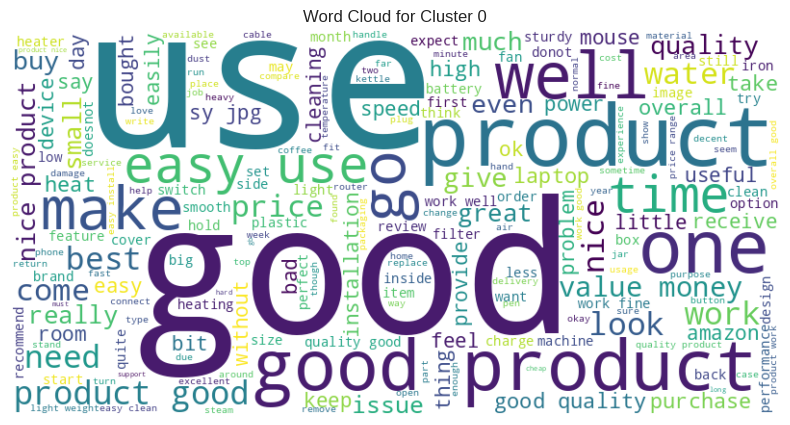

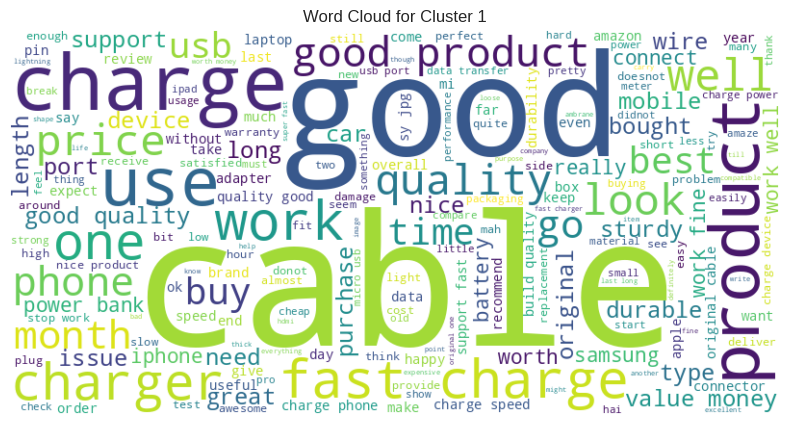

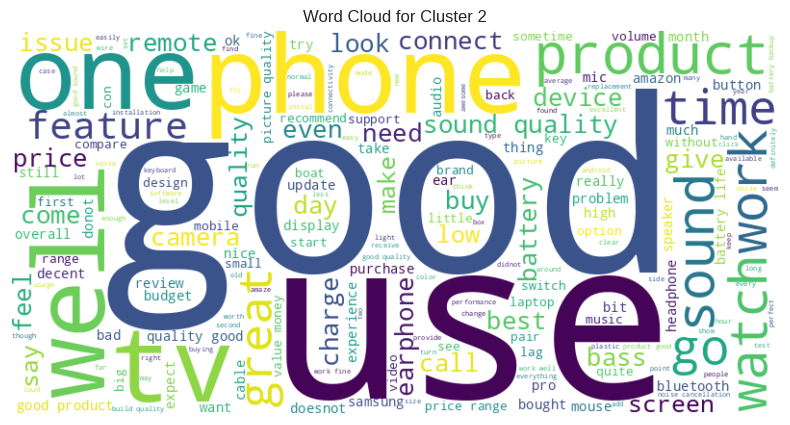

In [108]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Iterate through clusters
for cluster, text in grouped_by_cluster.items():
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for Cluster {cluster}")
    plt.show()
